In [1]:
# Energy Consumption by Sector

# Dependencies: Industrials
%matplotlib inline

import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import api_key from config file: Industrials
from api_keys import api_key

In [2]:
# Industrial
series_url = "http://api.eia.gov/series/?" + "api_key=" + api_key + "&series_id="

header_df = pd.DataFrame()
# # set up additional columns to hold header information
header_df["pk_id"] = ""
header_df["sector"] = ""
header_df["energy_source"] = ""
header_df["frequency"] = ""
header_df["name"] = ""
header_df["source"] = ""
header_df["series_id"] = ""
header_df["unit_long"] = ""
header_df["unit_short"] = ""

header_df["data_for"] = ""

line_df = pd.DataFrame()
# # set up additional columns to hold line information
line_df["fk_id"] = ""
line_df["year"] = ""
line_df["month"] = ""
line_df["value"] = ""

consumption_pre = "TOTAL."
consumption_post = ".A"
consumption_source = ["TEICBUS"
                      ]

pkid = 0
e_source = "Total Energy"
    
for count, cs in enumerate(consumption_source, start=pkid):
    query_url = series_url + consumption_pre + cs + consumption_post
    cons_json = requests.get(query_url).json()
    header_df = header_df.append({"pk_id" : count,
                                  "sector" : "Industrial",
                                  "energy_source" : e_source,
                                  "frequency" : "Annual",
                                  "name" : cons_json["series"][0]['name'],
                                  "source" : "EIA, U.S. Energy Information Administration",
                                  "series_id" : cons_json["series"][0]['series_id'], 
                                  "unit_long" : cons_json["series"][0]['units'],
                                  "data_for" : "Consumption",
                                 } , ignore_index=True )
    
    for dt in cons_json["series"][0]["data"]:
            line_df = line_df.append({"fk_id" : count,
                                      "year" : dt[0],
                                      "month" : 13,
                                      "value" : dt[1]
                               } , ignore_index=True )
    pkid = count
    
print("-----------------------------")
print("Data Retrieval Complete for Industrial Consumption")
print("-----------------------------")

header_df

-----------------------------
Data Retrieval Complete for Industrial Consumption
-----------------------------


,pk_id,sector,energy_source,frequency,name,source,series_id,unit_long,unit_short,data_for
0,0,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption


In [3]:
line_df.head()

,fk_id,year,month,value
0,0,2018,13,32617.767
1,0,2017,13,32005.673
2,0,2016,13,31452.839
3,0,2015,13,31471.524
4,0,2014,13,31797.941


In [4]:
line_df2 = line_df.rename(columns={"fk_id": "pk_id"})
line_df2.head()

,pk_id,year,month,value
0,0,2018,13,32617.767
1,0,2017,13,32005.673
2,0,2016,13,31452.839
3,0,2015,13,31471.524
4,0,2014,13,31797.941


In [5]:
ind_df = pd.merge(line_df2, header_df, on="pk_id")
ind_df.head()

,pk_id,year,month,value,sector,energy_source,frequency,name,source,series_id,unit_long,unit_short,data_for
0,0,2018,13,32617.767,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption
1,0,2017,13,32005.673,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption
2,0,2016,13,31452.839,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption
3,0,2015,13,31471.524,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption
4,0,2014,13,31797.941,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption


In [6]:
ind_df.tail()

,pk_id,year,month,value,sector,energy_source,frequency,name,source,series_id,unit_long,unit_short,data_for
65,0,1953,13,18211.754,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption
66,0,1952,13,17311.362,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption
67,0,1951,13,17678.532,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption
68,0,1950,13,16241.423,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption
69,0,1949,13,14723.587,Industrial,Total Energy,Annual,Total Energy Consumed by the Industrial Sector...,"EIA, U.S. Energy Information Administration",TOTAL.TEICBUS.A,Trillion Btu,NaN,Consumption


In [7]:
format_ind_df = pd.DataFrame(ind_df, columns=["sector","energy_source","year","value","unit_long"])
format_ind_df = format_ind_df.rename(columns={"energy_source": "source", "unit_long": "units"
                                         })

format_ind_df.head()

,sector,source,year,value,units
0,Industrial,Total Energy,2018,32617.767,Trillion Btu
1,Industrial,Total Energy,2017,32005.673,Trillion Btu
2,Industrial,Total Energy,2016,31452.839,Trillion Btu
3,Industrial,Total Energy,2015,31471.524,Trillion Btu
4,Industrial,Total Energy,2014,31797.941,Trillion Btu


In [8]:
# Commercial
url = "http://api.eia.gov/category/?"
query_url=f"{url}api_key={api_key}&series_id=TOTAL.CLCCBUS.A"

response=requests.get(query_url)
print(response.status_code)

query_url=f"{url}api_key={api_key}&category_id=711251"

eia_json = requests.get(query_url).json()

url = "http://api.eia.gov/series/?api_key="
api_code1="&series_id=TOTAL."
api_code2=".A"
category=["TECCBUS"]

200


In [9]:
start = []
end = []
f = []
name = []
sector = []
series_id = []
units = []
updated = []
year = []
value = []
data = []
count_cat = 0

for cat in category:
        query_url = url + api_key + api_code1 + cat + api_code2
        count_cat = count_cat + 1
        print("Processing Record " + str(count_cat) + " | " + cat)

        consumption_response = requests.get(query_url).json()
        
       
        data.append(consumption_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(consumption_response["series"][0]["start"])
            end.append(consumption_response["series"][0]["end"])
            f.append(consumption_response["series"][0]["f"])
            name.append(consumption_response["series"][0]["name"])
            sector.append(consumption_response["series"][0]["name"].split(" ")[5])
            series_id.append(consumption_response["series"][0]["series_id"])
            units.append(consumption_response["series"][0]["units"])
            updated.append(consumption_response["series"][0]["updated"])
            year.append(consumption_response["series"][0]["data"][i][0])
            value.append(consumption_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("---------------------")

Processing Record 1 | TECCBUS
-----------------------------
Data Retrieval Complete
---------------------


In [10]:
consumption_comm_df = pd.DataFrame({
   "start":start,
   "end":end,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "units": units,
   "updated": updated,
   "year": year,
   "value": value
})
consumption_comm_df["source"] = consumption_response["series"][0]["name"].split("Consumed")[0]
consumption_comm_df.head()

,start,end,name,sector,series_id,units,updated,year,value,source
0,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2018,18607.551,Total Energy
1,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2017,17899.252,Total Energy
2,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2016,18030.223,Total Energy
3,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2015,18156.728,Total Energy
4,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2014,18264.465,Total Energy


In [11]:
consumption_comm_df.tail()

,start,end,name,sector,series_id,units,updated,year,value,source
65,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1953,3770.982,Total Energy
66,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1952,3873.385,Total Energy
67,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1951,3873.226,Total Energy
68,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1950,3893.298,Total Energy
69,1949,2018,Total Energy Consumed by the Commercial Sector...,Commercial,TOTAL.TECCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1949,3668.816,Total Energy


In [12]:
format_comm_df = pd.DataFrame(consumption_comm_df, columns=["sector","source","year","value","units"])
format_comm_df.head()

,sector,source,year,value,units
0,Commercial,Total Energy,2018,18607.551,Trillion Btu
1,Commercial,Total Energy,2017,17899.252,Trillion Btu
2,Commercial,Total Energy,2016,18030.223,Trillion Btu
3,Commercial,Total Energy,2015,18156.728,Trillion Btu
4,Commercial,Total Energy,2014,18264.465,Trillion Btu


In [13]:
# Transportation
url = "http://api.eia.gov/series/?api_key="
api_code1="&series_id=TOTAL."
api_code2=".A"
category=["TEACBUS"]

In [14]:
start = []
end = []
f = []
name = []
sector = []
series_id = []
units = []
updated = []
year = []
value = []
data = []
count_cat = 0

for cat in category:
        query_url = url + api_key + api_code1 + cat + api_code2
        count_cat = count_cat + 1
        print("Processing Record " + str(count_cat) + " | " + cat)

        consumption_response = requests.get(query_url).json()
        
       
        data.append(consumption_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(consumption_response["series"][0]["start"])
            end.append(consumption_response["series"][0]["end"])
            f.append(consumption_response["series"][0]["f"])
            name.append(consumption_response["series"][0]["name"])
            sector.append(consumption_response["series"][0]["name"].split(" ")[5])
            series_id.append(consumption_response["series"][0]["series_id"])
            units.append(consumption_response["series"][0]["units"])
            updated.append(consumption_response["series"][0]["updated"])
            year.append(consumption_response["series"][0]["data"][i][0])
            value.append(consumption_response["series"][0]["data"][i][1])

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | TEACBUS
-----------------------------
Data Retrieval Complete
-----------------------------


In [15]:
consumption_trans_df = pd.DataFrame({
   "start":start,
   "end":end,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "units": units,
   "updated": updated,
   "year": year,
   "value": value
})
consumption_trans_df["source"] = consumption_response["series"][0]["name"].split("Consumed")[0]
consumption_trans_df.head()

,start,end,name,sector,series_id,units,updated,year,value,source
0,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,2018,28390.532,Total Energy
1,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,2017,28014.167,Total Energy
2,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,2016,27785.537,Total Energy
3,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,2015,27238.037,Total Energy
4,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,2014,26868.857,Total Energy


In [16]:
consumption_trans_df.tail()

,start,end,name,sector,series_id,units,updated,year,value,source
65,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,1953,9123.022,Total Energy
66,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,1952,9002.752,Total Energy
67,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,1951,9041.892,Total Energy
68,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,1950,8492.473,Total Energy
69,1949,2018,Total Energy Consumed by the Transportation Se...,Transportation,TOTAL.TEACBUS.A,Trillion Btu,2019-05-23T15:52:44-0400,1949,7990.015,Total Energy


In [17]:
format_trans_df = pd.DataFrame(consumption_trans_df, columns=["sector","source","year","value","units"])
format_trans_df.head()

,sector,source,year,value,units
0,Transportation,Total Energy,2018,28390.532,Trillion Btu
1,Transportation,Total Energy,2017,28014.167,Trillion Btu
2,Transportation,Total Energy,2016,27785.537,Trillion Btu
3,Transportation,Total Energy,2015,27238.037,Trillion Btu
4,Transportation,Total Energy,2014,26868.857,Trillion Btu


In [18]:
# Residential
#http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=TOTAL.TERCBUS.A

url = "http://api.eia.gov/series/?api_key="
api_code1 = "&series_id=TOTAL."
api_energy_source = "TERCBUS"
api_period = ".A"    

In [19]:
start = []
end = []
f = []
name = []
sector = []
sec = "Residential"
source = []
energy_source = "Total Energy"
series_id = []
units = []
updated = []
year = []
value = []
count_st = 0

query_url = url + api_key + api_code1 + api_energy_source + api_period
consume_res_resp = requests.get(query_url).json()
     
data = []
data.append(consume_res_resp["series"][0]["data"])
ln = (len(data[0]))

for i in range(0, ln):

    start.append(consume_res_resp["series"][0]["start"])
    end.append(consume_res_resp["series"][0]["end"])
    f.append(consume_res_resp["series"][0]["f"])
    name.append(consume_res_resp["series"][0]["name"])
    source.append(energy_source)
    sector.append(sec)
    series_id.append(consume_res_resp["series"][0]["series_id"])
    units.append(consume_res_resp["series"][0]["units"])
    updated.append(consume_res_resp["series"][0]["updated"])
    year.append(consume_res_resp["series"][0]["data"][i][0])
    value.append(consume_res_resp["series"][0]["data"][i][1])
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

-----------------------------
Data Retrieval Complete
-----------------------------


In [20]:
#Create DataFrame
energy_consume_resi_df = pd.DataFrame({
    "start": start,
    "end": end,
    "f": f,
    "name": name,
    "source": source,
    "sector": sector,
    "series_id": series_id,
    "units": units,
    "updated": updated,
    "year": year,
    "value": value
    
})
energy_consume_resi_df.head()

,start,end,f,name,source,sector,series_id,units,updated,year,value
0,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2018,21621.074
1,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2017,19889.581
2,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2016,20181.113
3,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2015,20616.830
4,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,2014,21444.938


In [21]:
energy_consume_resi_df.tail()

,start,end,f,name,source,sector,series_id,units,updated,year,value
65,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1953,6558.748
66,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1952,6560.243
67,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1951,6380.193
68,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1950,5988.553
69,1949,2018,A,Total Energy Consumed by the Residential Secto...,Total Energy,Residential,TOTAL.TERCBUS.A,Trillion Btu,2019-06-24T11:59:37-0400,1949,5599.250


In [22]:
format_resi_df = pd.DataFrame(energy_consume_resi_df, columns=["sector","source","year","value","units"])
format_resi_df.head()

,sector,source,year,value,units
0,Residential,Total Energy,2018,21621.074,Trillion Btu
1,Residential,Total Energy,2017,19889.581,Trillion Btu
2,Residential,Total Energy,2016,20181.113,Trillion Btu
3,Residential,Total Energy,2015,20616.830,Trillion Btu
4,Residential,Total Energy,2014,21444.938,Trillion Btu


In [23]:
# master consumption DataFrame
master_consum_df = pd.DataFrame()
master_consum_df["sector"] = []
master_consum_df["source"] = []
master_consum_df["year"] = []
master_consum_df["value"] = []
master_consum_df["units"] = []

master_consum_df = master_consum_df.append(format_ind_df)
master_consum_df = master_consum_df.append(format_comm_df)
master_consum_df = master_consum_df.append(format_trans_df)
master_consum_df = master_consum_df.append(format_resi_df)
master_consum_df

,sector,source,year,value,units
0,Industrial,Total Energy,2018,32617.767,Trillion Btu
1,Industrial,Total Energy,2017,32005.673,Trillion Btu
2,Industrial,Total Energy,2016,31452.839,Trillion Btu
3,Industrial,Total Energy,2015,31471.524,Trillion Btu
4,Industrial,Total Energy,2014,31797.941,Trillion Btu
5,Industrial,Total Energy,2013,31627.437,Trillion Btu
6,Industrial,Total Energy,2012,31060.724,Trillion Btu
7,Industrial,Total Energy,2011,30981.322,Trillion Btu
8,Industrial,Total Energy,2010,30670.436,Trillion Btu
9,Industrial,Total Energy,2009,28465.439,Trillion Btu


In [24]:
master_consum_df.shape

(280, 5)

In [25]:
master_consum_df.dtypes

sector     object
source     object
year       object
value     float64
units      object
dtype: object

In [26]:
master_consum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 69
Data columns (total 5 columns):
sector    280 non-null object
source    280 non-null object
year      280 non-null object
value     280 non-null float64
units     280 non-null object
dtypes: float64(1), object(4)
memory usage: 13.1+ KB


In [27]:
master_consum_df.describe()

,value
count,280.000000
mean,18746.007143
std,8485.537439
min,3668.816000
25%,11630.982750
50%,18138.573500
75%,26287.001750
max,35198.990000


In [51]:
master_consum_df = master_consum_df.sort_values(by='year',ascending=True)
master_consum_df

,sector,source,year,value,units
69,Commercial,Total Energy,1949,3668.816,Trillion Btu
69,Transportation,Total Energy,1949,7990.015,Trillion Btu
69,Industrial,Total Energy,1949,14723.587,Trillion Btu
69,Residential,Total Energy,1949,5599.250,Trillion Btu
68,Industrial,Total Energy,1950,16241.423,Trillion Btu
68,Transportation,Total Energy,1950,8492.473,Trillion Btu
68,Commercial,Total Energy,1950,3893.298,Trillion Btu
68,Residential,Total Energy,1950,5988.553,Trillion Btu
67,Industrial,Total Energy,1951,17678.532,Trillion Btu
67,Commercial,Total Energy,1951,3873.226,Trillion Btu


In [67]:
x_ind = master_consum_df[master_consum_df.sector=="Industrial"].year[-10:]
x_comm = master_consum_df[master_consum_df.sector=="Commercial"].year[-10:]
x_trans = master_consum_df[master_consum_df.sector=="Transportation"].year[-10:]
x_resi = master_consum_df[master_consum_df.sector=="Residential"].year[-10:]


y_ind = master_consum_df[master_consum_df.sector=="Industrial"].value[-10:]
y_comm = master_consum_df[master_consum_df.sector=="Commercial"].value[-10:]
y_trans = master_consum_df[master_consum_df.sector=="Transportation"].value[-10:]
y_resi = master_consum_df[master_consum_df.sector=="Residential"].value[-10:]


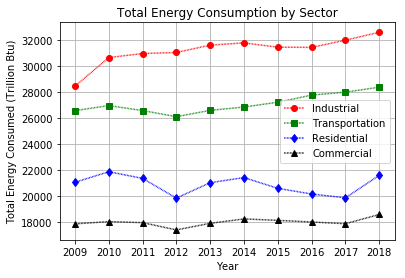

In [129]:
y_columns = ["Industrial", "Transportation", "Residential", "Commercial", ]

plt.plot(x_ind, y_ind, color="red", linestyle=(0, (.5,.5)), marker="o")
plt.plot(x_trans, y_trans, color="green", linestyle=(0, (.5,.5)),marker="s")
plt.plot(x_resi, y_resi, color="blue", linestyle=(0, (.5,.5)),marker="d")
plt.plot(x_comm, y_comm, color="black", linestyle=(0, (.5,.5)),marker="^")

plt.legend(y_columns)

plt.title("Total Energy Consumption by Sector")
plt.xlabel("Year")
plt.ylabel("Total Energy Consumed (Trillion Btu)")

plt.grid()


# Save the Figure
plt.savefig('Total Energy_Energy Consumption by Sector.png') 
# Show the Figure
plt.show()


In [116]:
# Compound Annual Growth

ind_yr_f = master_consum_df[master_consum_df.sector=="Industrial"].year[-10:-9]
comm_yr_f = master_consum_df[master_consum_df.sector=="Commercial"].year[-10:-9]
trans_yr_f = master_consum_df[master_consum_df.sector=="Transportation"].year[-10:-9]
resi_yr_f = master_consum_df[master_consum_df.sector=="Residential"].year[-10:-9]

ind_yr_l = master_consum_df[master_consum_df.sector=="Industrial"].year[-1:]
comm_yr_l = master_consum_df[master_consum_df.sector=="Commercial"].year[-1:]
trans_yr_l = master_consum_df[master_consum_df.sector=="Transportation"].year[-1:]
resi_yr_l = master_consum_df[master_consum_df.sector=="Residential"].year[-1:]

ind_years = int(ind_yr_l) - int(ind_yr_f) + 1
comm_years = int(comm_yr_l) - int(comm_yr_f) + 1
trans_years = int(trans_yr_l) - int(trans_yr_f) + 1
resi_years = int(resi_yr_l) - int(resi_yr_f) + 1

ind_f = master_consum_df[master_consum_df.sector=="Industrial"].value[-10:-9]
comm_f = master_consum_df[master_consum_df.sector=="Commercial"].value[-10:-9]
trans_f = master_consum_df[master_consum_df.sector=="Transportation"].value[-10:-9]
resi_f = master_consum_df[master_consum_df.sector=="Residential"].value[-10:-9]

ind_l = master_consum_df[master_consum_df.sector=="Industrial"].value[-1:]
comm_l = master_consum_df[master_consum_df.sector=="Commercial"].value[-1:]
trans_l = master_consum_df[master_consum_df.sector=="Transportation"].value[-1:]
resi_l = master_consum_df[master_consum_df.sector=="Residential"].value[-1:]

cagr_ind = (int(ind_l) / int(ind_f))**(1/ind_years) - 1
cagr_comm = (int(comm_l) / int(comm_f))**(1/comm_years) - 1
cagr_trans = (int(trans_l) / int(trans_f))**(1/trans_years) - 1
cagr_resi = (int(resi_l) / int(resi_f))**(1/resi_years) - 1

print("Industrial had a CAGR of {:.2%}".format(cagr_ind) + " from " + str(int(ind_yr_f)) + " to " + str(int(ind_yr_l)))
print('Commercial had a CAGR of {:.2%} '.format(cagr_comm) + "from " + str(int(comm_yr_f)) + " to " + str(int(comm_yr_l)))
print('Transportation had a CAGR of {:.2%} '.format(cagr_trans) + "from " + str(int(trans_yr_f)) + " to " + str(int(trans_yr_l)))
print('Residential had a CAGR of {:.2%} '.format(cagr_resi) + "from " + str(int(resi_yr_f)) + " to " + str(int(resi_yr_f)))

Industrial had a CAGR of 1.37% from 2009 to 2018
Commercial had a CAGR of 0.40% from 2009 to 2018
Transportation had a CAGR of 0.66% from 2009 to 2018
Residential had a CAGR of 0.25% from 2009 to 2009
